In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from vega_datasets import data


### SF Weather

#### 1.) Resample by the day and take the average temperature. Visualize the average temperature over time.

In [2]:
df = data.sf_temps()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [5]:
# Set index to date
df = df.set_index('date')

In [6]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


<AxesSubplot:xlabel='date'>

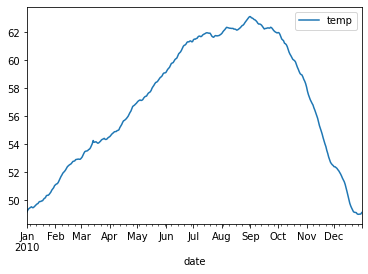

In [7]:
# Resample by day and take the average temp then plot it
daily_avg = df.resample('d').mean()
daily_avg.plot()

#### 2.) Write the code necessary to visualize the minimum temperature over time.

<AxesSubplot:xlabel='date'>

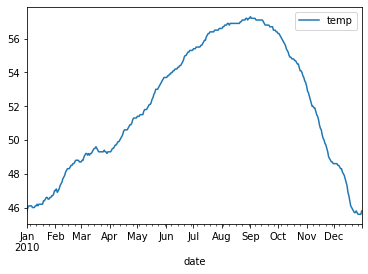

In [8]:
daily_min = df.resample('d').min()
daily_min.plot()


#### 3.) Write the code necessary to visualize the maximum temperature over time.

<AxesSubplot:xlabel='date'>

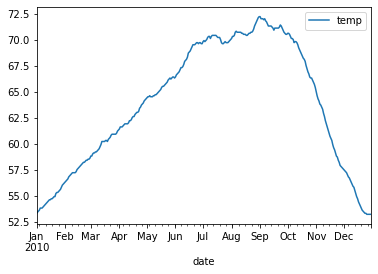

In [9]:
avg_max = df.resample('d').max()
avg_max.plot()

#### 4.) Which month is the coldest, on average?

<AxesSubplot:xlabel='date'>

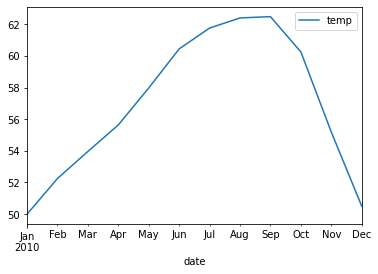

In [10]:
monthly_avg = df.resample('m').mean()
monthly_avg.plot()

In [11]:
monthly_avg.idxmin()[0].strftime('%B')

'January'

In [12]:
monthly_avg.temp.idxmin().month_name()

'January'

#### 5.) Which month has the highest average temperature?

In [13]:
monthly_avg.idxmax()[0].strftime("%B")

'September'

In [14]:
monthly_avg.temp.idxmax().month_name()

'September'

#### 6.) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [25]:
daily = df.resample('D').temp.agg(['min', 'max'])
daily['temp_change'] = daily['max'] - daily['min']
daily['month'] = daily.index.strftime('%m-%b')
pd.DataFrame(daily.groupby('month').temp_change.max().sort_values(ascending=False))

,temp_change
month,
08-Aug,15.0
09-Sep,14.9
06-Jun,14.8
07-Jul,14.8
10-Oct,14.4
05-May,13.1
04-Apr,13.0
03-Mar,12.0
11-Nov,11.8


#### Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [ ]:
daily_aggs = df.resample('D').agg({'temp': ['min', 'max', 'mean']})
daily_aggs.plot()

### Seattle Weather

In [29]:
df = data.seattle_weather()

In [30]:
df = df.set_index('date')

In [31]:
df['month'] = df.index.strftime('%m-%b')
df['year'] = df.index.year
df.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,01-Jan,2012
2012-01-02,10.9,10.6,2.8,4.5,rain,01-Jan,2012
2012-01-03,0.8,11.7,7.2,2.3,rain,01-Jan,2012
2012-01-04,20.3,12.2,5.6,4.7,rain,01-Jan,2012
2012-01-05,1.3,8.9,2.8,6.1,rain,01-Jan,2012


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   month          1461 non-null   object 
 6   year           1461 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 91.3+ KB


#### 1.) Which year and month combination has the highest amount of precipitation?

In [33]:
monthly_precip = df.resample('M').precipitation.sum()
monthly_precip.idxmax().strftime("%B %Y")

'December 2015'

In [38]:
pd.DataFrame(df.resample('M').precipitation.sum().sort_values(ascending = False))

,precipitation
date,
2015-12-31,284.5
2014-03-31,240.0
2015-11-30,212.6
2012-11-30,210.5
2012-03-31,183.0
2012-12-31,174.0
2012-01-31,173.3
2014-10-31,171.5
2012-10-31,170.3


#### 2.) Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

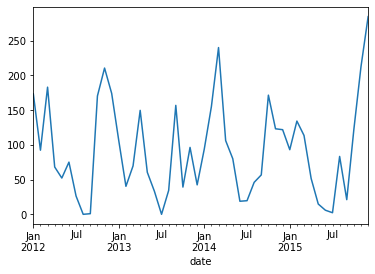

In [34]:
monthly_precip = df.resample('M').precipitation.sum()
monthly_precip.plot()

#### 3.) Visualize the amount of wind over time. Choose a time interval you think is appropriate.

<AxesSubplot:xlabel='date'>

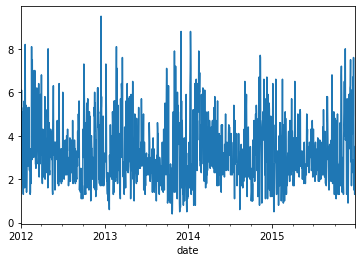

In [40]:
daily_wind = df.resample('d').wind.mean()
daily_wind.plot()

<AxesSubplot:xlabel='date'>

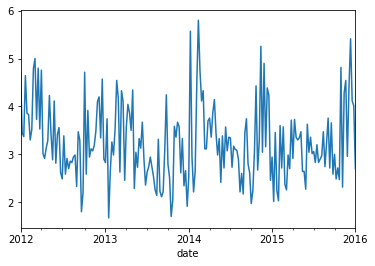

In [41]:
weekly_wind = df.resample('W').wind.mean()
weekly_wind.plot()

<AxesSubplot:xlabel='date'>

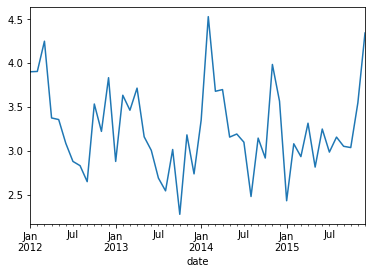

In [42]:
monthly_wind = df.resample('m').wind.mean()
monthly_wind.plot()

<AxesSubplot:xlabel='date'>

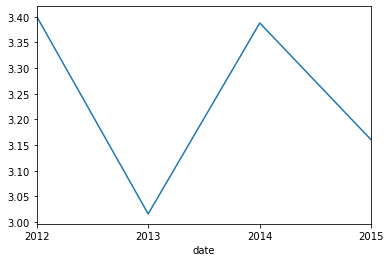

In [43]:
yearly_wind = df.resample('y').wind.mean()
yearly_wind.plot()

<AxesSubplot:xlabel='date'>

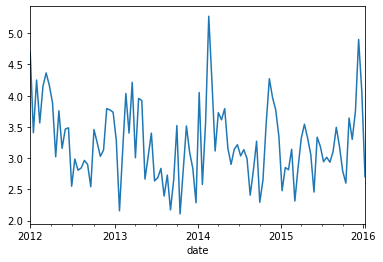

In [39]:
# 2 week average
df.resample('2w').wind.mean().plot()

#### 4.) Which year-month combination is the windiest?

In [ ]:
y_m_combo = df.resample('m').wind.mean()
y_m_combo.idxmax().strftime('%B %Y')

#### 5.) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [ ]:
df.weather.value_counts()

In [ ]:
df['sunny'] = (df.weather == 'sun')
sunny_days = df.resample('Y').sunny.sum()

In [ ]:
df.head()

In [ ]:
sunny_days.idxmax().strftime('%Y')

#### 6.) In which month does it rain the most?

In [ ]:
df['rainy'] = (df.weather == 'rain')
rainy_days = df.resample('m').rainy.sum()
rainy_days.idxmax().strftime('%B %Y')

#### 7.) Which month has the most number of days with a non-zero amount of precipitation?

### Flight Data

In [ ]:
df = data.flights_20k()

In [ ]:
df.info()

In [ ]:
df = df.set_index('date')
df.head()

#### 1.) Convert any negative delays to 0.


In [ ]:
df.delay = df.delay.apply(lambda x: x if x > 0 else 0)

In [ ]:
df.head()

#### 2.) Which hour of the day has the highest average delay? 

In [ ]:
df.groupby(df.index.hour).delay.mean().plot()

#### 3.) Does the day of the week make a difference in the delay amount?